# Introduction

In this portfolio, we are going to do End to end Machine Learning project.For group part,first sampling data into two part such train and test dataset.After that,Exploratory Data Analysis (EDA) is done which is an approach for data analysis that employs a variety of techniques to maximize insight into a data set;uncover underlying structure;extract important variables;detect outliers;develop parsimonious models.Finally data preprocessing is done for algorthirm model

# Business objective

The business objective of this project is to predict the selling price of second hand car which is sold in india, given past records on sold car in the india.we can model a resale valuation for used cars.

the content of this dataset contains information about approx 21000 used cars scraped from www.cardekho.com.


the exact source of the dataset is https://www.kaggle.com/saisaathvik/used-cars-dataset-from-cardekhocom?select=cardekho_updated.csv


Context of this dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.

In [1]:
#imports
import pandas as pd  # Importing package pandas (For Data Analysis)
import numpy as np   # Importing package numpys (For Numerical Python)
import matplotlib.pyplot as plt # Importing pyplot interface to use matplotlib
from scipy import stats #imported scipy to perform hypothesis testing
import statsmodels.api as sm #imported statsmodels for linear regression
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Lathapriya\Documents\Big Data for Decision making\Assignment\cardekho_imputated.csv")

In [5]:
df.head() #to display the first 5 rows in our dataset

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df.shape

(15411, 16)

# Step 2. Train-test split

# Random sampling¶

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

12328 train and 3083 test instances


we are using random sampling to split the full data set into training dataset and test dataset. we set test size as 20% of the full dataset and random state as 7 so we can reuse it again to produce same train-test split.

# Stratified sampling

Stratified sampling ensure that critical parts of the population are represented in the sample and and it divides the population into smaller sub-group. So that the sampling data is not skewed towards a particular variable to avoid baised. In our dataset, we used vehicle age category to split data to represent same proportion as it represent in population dataset.we subdivide it into 5 label. With regards to the age of the vehicle, we needed to stratify it to ensure that cars with lower ages are represented in the population

In [8]:
df["Vehicle_age_cat"] = pd.cut(df["vehicle_age"], bins=[-1.,1.,3.,5.,6., np.inf],
                          labels=[1, 2, 3, 4,5])

In [9]:
df["Vehicle_age_cat"].value_counts()

5    5821
3    4369
2    3071
4    1924
1     226
Name: Vehicle_age_cat, dtype: int64

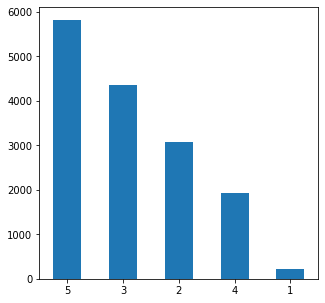

In [10]:
plt.figure(figsize=(5,5))
df["Vehicle_age_cat"].value_counts().plot(kind="bar", rot=0)

The above histogram shows the distribution of vehicle age category

In [11]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=7,
                                                  stratify=df["Vehicle_age_cat"])

In [12]:
def Vehicle_age_cat_proportions(data):
    return data["Vehicle_age_cat"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.2, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": Vehicle_age_cat_proportions(df),
    "Random test set": Vehicle_age_cat_proportions(rand_test_set),
    "Stratified test set": Vehicle_age_cat_proportions(strat_test_set),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
1,0.014665,0.015569,0.014596,6.167134,-0.468312
2,0.199273,0.193967,0.199157,-2.662842,-0.058503
3,0.283499,0.284463,0.283490,0.340173,-0.003066
4,0.124846,0.124230,0.124878,-0.493603,0.026013
5,0.377717,0.381771,0.377879,1.073233,0.042750


Category 1 also seems over represented in the dataset at 9.8% for random sampling.Category 3 and 4 are under 1.07 % and 3.25% respectively. We used stratified sampling to make them more representative
Stratification sampling resulted in under- or over-representations of vehicle age categories of no more than 1.14%.

In [13]:
del strat_train_set["Vehicle_age_cat"]
del strat_test_set["Vehicle_age_cat"]

we removed the vehicle age category from the dataset

In [14]:
trainset = strat_train_set
testset = strat_test_set

Finally we are subdivided our dataset as trainset and testset using stratified sampling

# Descriptive statistics

In [15]:
trainset.describe()

,Unnamed: 0,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,12328.000000,1.232800e+04,1.232800e+04,12328.000000,1.232800e+04,12328.000000,12328.000000,12328.000000,12328.00000,1.232800e+04
mean,9809.721285,5.350299e+06,1.943757e+06,6.037962,5.547743e+04,19.696906,1483.024335,100.235363,5.32487,7.663886e+05
std,5648.644245,5.223941e+07,2.770029e+06,3.008981,5.389769e+04,4.143703,518.407074,42.247544,0.80750,8.064740e+05
min,1.000000,3.110000e+05,4.360000e+05,0.000000,1.000000e+02,7.500000,793.000000,38.400000,0.00000,4.500000e+04
25%,4902.750000,6.650000e+05,8.630000e+05,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.00000,3.850000e+05
50%,9863.000000,8.540829e+05,1.183000e+06,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.00000,5.590000e+05
75%,14682.750000,1.282250e+06,1.736000e+06,8.000000,7.000000e+04,22.690000,1582.000000,117.300000,5.00000,8.125000e+05
max,19543.000000,9.680667e+08,5.090000e+07,29.000000,3.800000e+06,33.540000,5998.000000,626.000000,9.00000,1.450000e+07


the data has the columns vehicle_age,Km_driven,mileage,max_power,seats,selling_price, engine is as continuous variable for which we can see descriptive statistics using the describe () method for trainset

In [16]:
trainset['fuel_type'].value_counts()

Petrol      6155
Diesel      5891
CNG          240
LPG           39
Electric       3
Name: fuel_type, dtype: int64

In [17]:
trainset['transmission_type'].value_counts()

Manual       9801
Automatic    2527
Name: transmission_type, dtype: int64

In [18]:
trainset['seller_type'].value_counts()

Dealer              7638
Individual          4556
Trustmark Dealer     134
Name: seller_type, dtype: int64

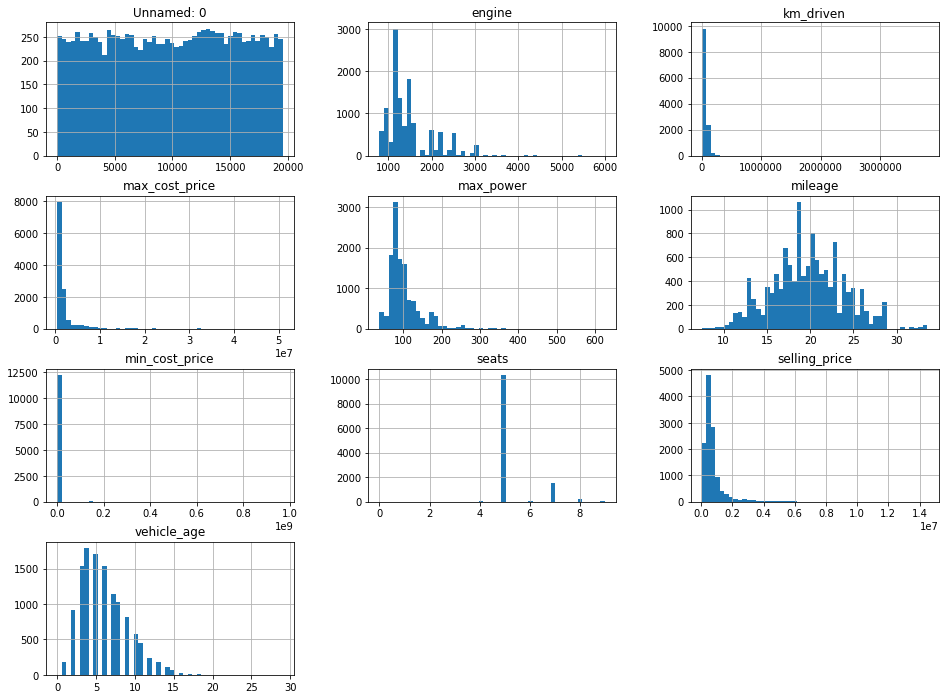

In [19]:
dummy = trainset.hist(bins=50, figsize=(16,12))

the distribution of all the continuous variables can be showed in above histogram

# Exploratory Data Analysis

Visualization of All the variables

In [20]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12328 entries, 8425 to 3881
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12328 non-null  int64  
 1   car_name           12328 non-null  object 
 2   brand              12328 non-null  object 
 3   model              12328 non-null  object 
 4   min_cost_price     12328 non-null  float64
 5   max_cost_price     12328 non-null  float64
 6   vehicle_age        12328 non-null  int64  
 7   km_driven          12328 non-null  int64  
 8   seller_type        12328 non-null  object 
 9   fuel_type          12328 non-null  object 
 10  transmission_type  12328 non-null  object 
 11  mileage            12328 non-null  float64
 12  engine             12328 non-null  int64  
 13  max_power          12328 non-null  float64
 14  seats              12328 non-null  int64  
 15  selling_price      12328 non-null  int64  
dtypes: float64(4), int64

In [21]:
trainset["seats"] = df["seats"].astype("category")

C:\Users\Lathapriya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


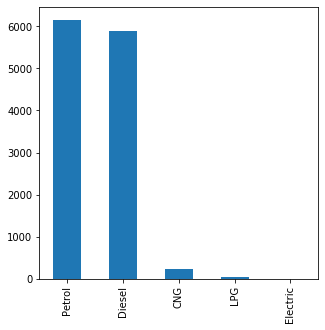

In [22]:
plt.figure(figsize=(5,5))
trainset['fuel_type'].value_counts().plot.bar()

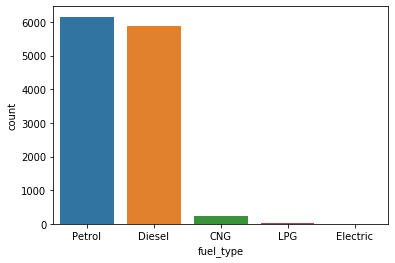

In [23]:
sns.countplot(trainset['fuel_type'])

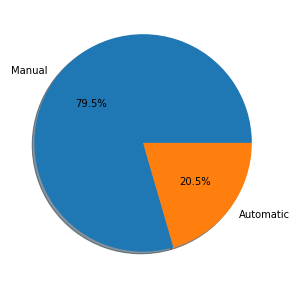

In [24]:
plt.figure(figsize=(5,5))
plt.pie(trainset['transmission_type'].value_counts(),autopct="%.1f%%",labels=["Manual","Automatic"],shadow=True)
plt.show()

Text(0.5, 1.0, 'Top 10 car brands on sale')

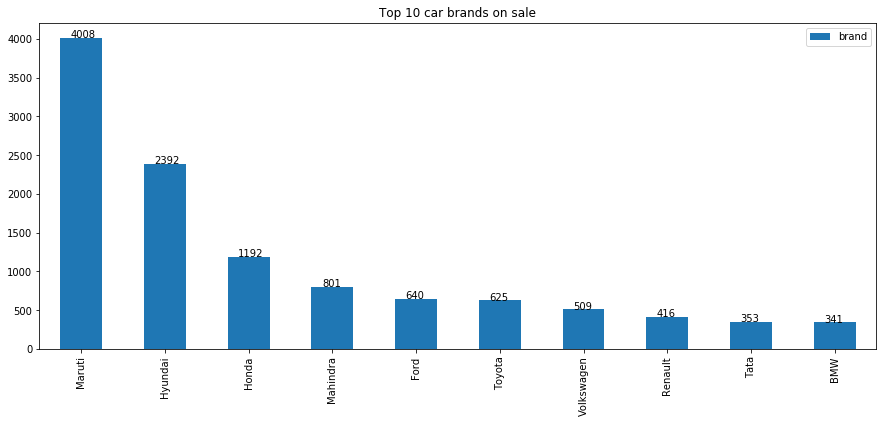

In [25]:
df_brand = pd.DataFrame(trainset.brand.value_counts())
ax = df_brand.head(10).plot.bar(figsize=(15,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/4), p.get_height()+5), rotation=0)
    
plt.title("Top 10 car brands on sale")

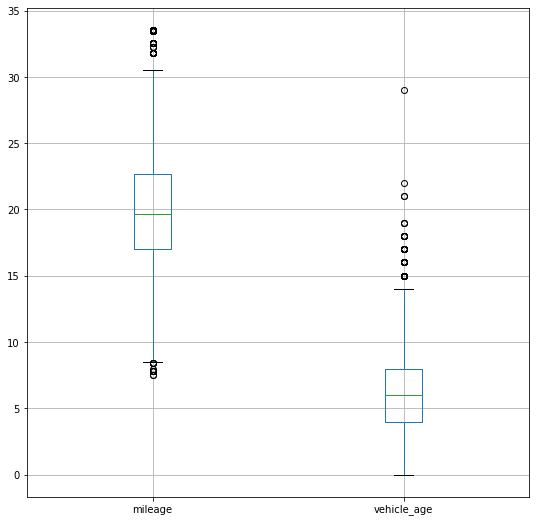

In [26]:
plt.figure(figsize=(9,9))
trainset.boxplot(column=["mileage","vehicle_age" ])
plt.show()

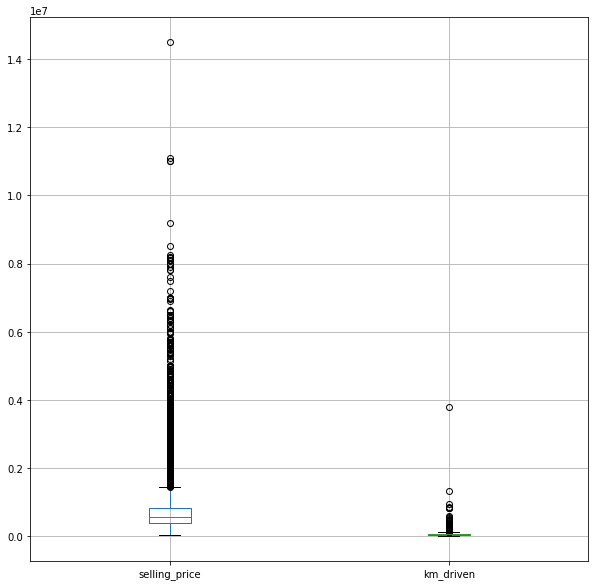

In [27]:
plt.figure(figsize=(10,10))
trainset.boxplot(column=["selling_price","km_driven"])
plt.show()

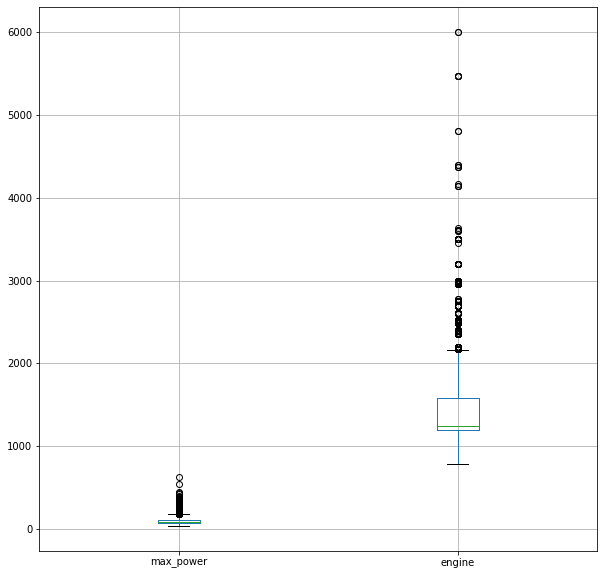

In [28]:
plt.figure(figsize=(10,10))
trainset.boxplot(column=["max_power","engine"])
plt.show()

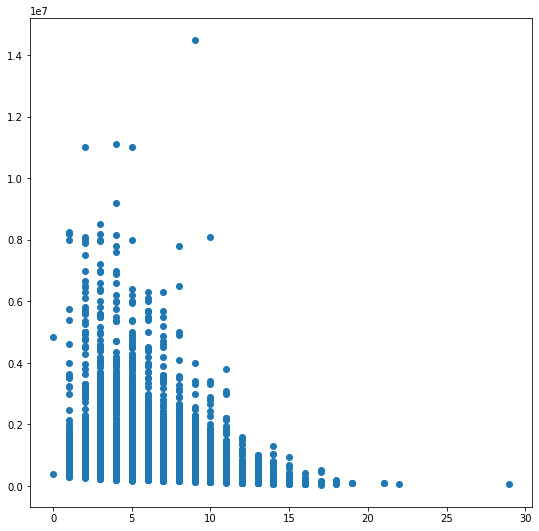

In [29]:
plt.figure(figsize=(9,9))
plt.scatter(trainset.vehicle_age,trainset.selling_price)
plt.show()

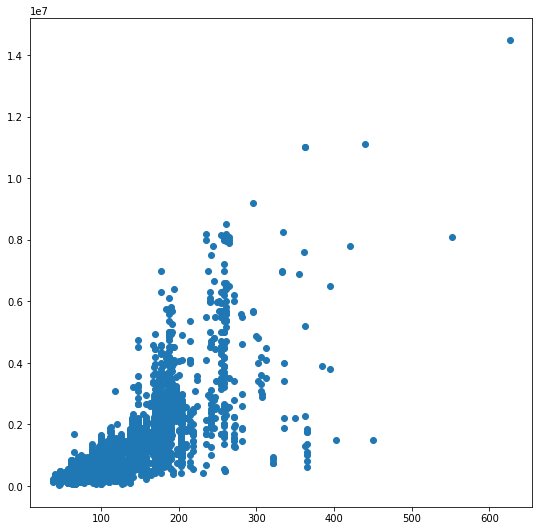

In [30]:
plt.figure(figsize=(9,9))
plt.scatter(trainset.max_power,trainset.selling_price)
plt.show()

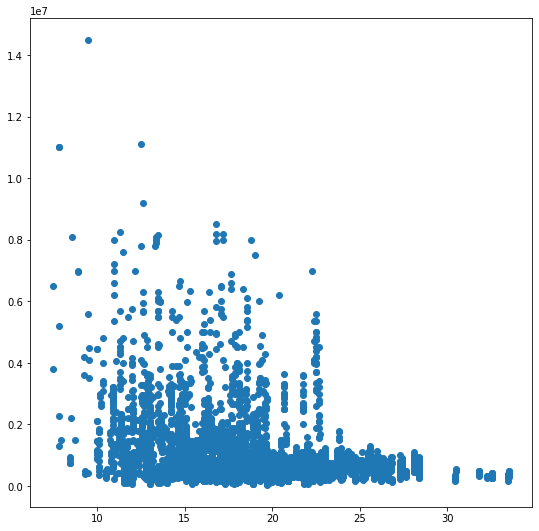

In [31]:
plt.figure(figsize=(9,9))
plt.scatter(trainset.mileage,trainset.selling_price)
plt.show()

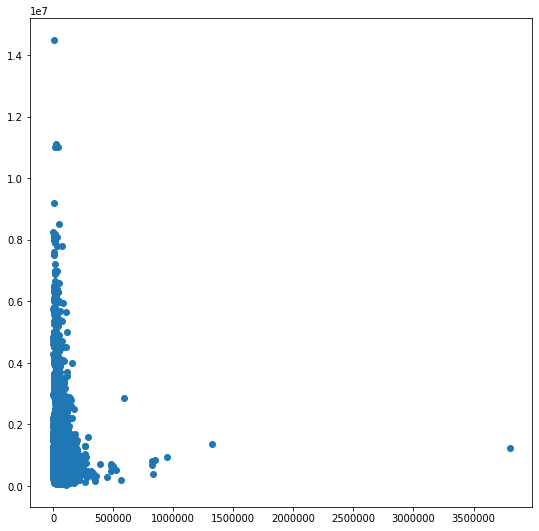

In [32]:
plt.figure(figsize=(9,9))
plt.scatter(trainset.km_driven,trainset.selling_price)
plt.show()

# Data preprocessing

The summary of dataprocessing step, first unnecessary variable is removed from both trainset and testset.Then removed outliers from the trainset for better prediction model.there is no missing value in our dataset.we did scaling feature for the target variable.we created dummy variable for all the categorical variable such  fuel type and transmission type.we checked correlation for all the variables respect to the target variable.

In [33]:
del trainset["min_cost_price"]
del testset["min_cost_price"]

In [34]:
del trainset["max_cost_price"]
del testset["max_cost_price"]

In [35]:
del trainset["car_name"]
del testset["car_name"]

In [36]:
del trainset["Unnamed: 0"]
del testset["Unnamed: 0"]

In [37]:
del trainset["seats"]
del testset["seats"]

In [38]:
del trainset["brand"]
del testset["brand"]

In [39]:
del trainset["model"]
del testset["model"]

In [40]:
del trainset["transmission_type"]
del testset["transmission_type"]

In [41]:
del trainset["seller_type"]
del testset["seller_type"]

In [42]:
trainset.head()

,vehicle_age,km_driven,fuel_type,mileage,engine,max_power,selling_price
8425,4,30000,Petrol,14.67,1798,177.46,1960000
10819,2,40000,Diesel,24.70,1047,69.00,529000
4790,8,56000,Petrol,19.10,1197,85.80,430000
5336,15,65000,Petrol,18.90,998,67.10,175000
2708,9,62000,Petrol,19.81,1086,68.05,255000


# Removing the outlier

In [43]:
trainset = trainset.drop(trainset[trainset.km_driven >130000].index)
trainset = trainset.drop(trainset[trainset["max_power"]>200].index)
trainset = trainset.drop(trainset[trainset["engine"]>2000].index)
trainset = trainset.drop(trainset[trainset["vehicle_age"]>20].index)

In [44]:
trainset.isnull().sum()

vehicle_age      0
km_driven        0
fuel_type        0
mileage          0
engine           0
max_power        0
selling_price    0
dtype: int64

In [45]:
trainset.describe()

,vehicle_age,km_driven,mileage,engine,max_power,selling_price
count,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,1.030500e+04
mean,5.863561,48905.286075,20.711049,1301.428530,90.585820,6.223277e+05
std,2.950783,27244.989729,3.550381,270.088691,28.421641,4.972108e+05
min,0.000000,100.000000,10.500000,793.000000,38.400000,4.500000e+04
25%,4.000000,27884.000000,18.150000,1197.000000,73.900000,3.600000e+05
50%,5.000000,47527.000000,20.400000,1248.000000,83.140000,5.250000e+05
75%,8.000000,67000.000000,23.000000,1497.000000,103.000000,7.250000e+05
max,19.000000,130000.000000,33.540000,1999.000000,197.130000,6.975000e+06


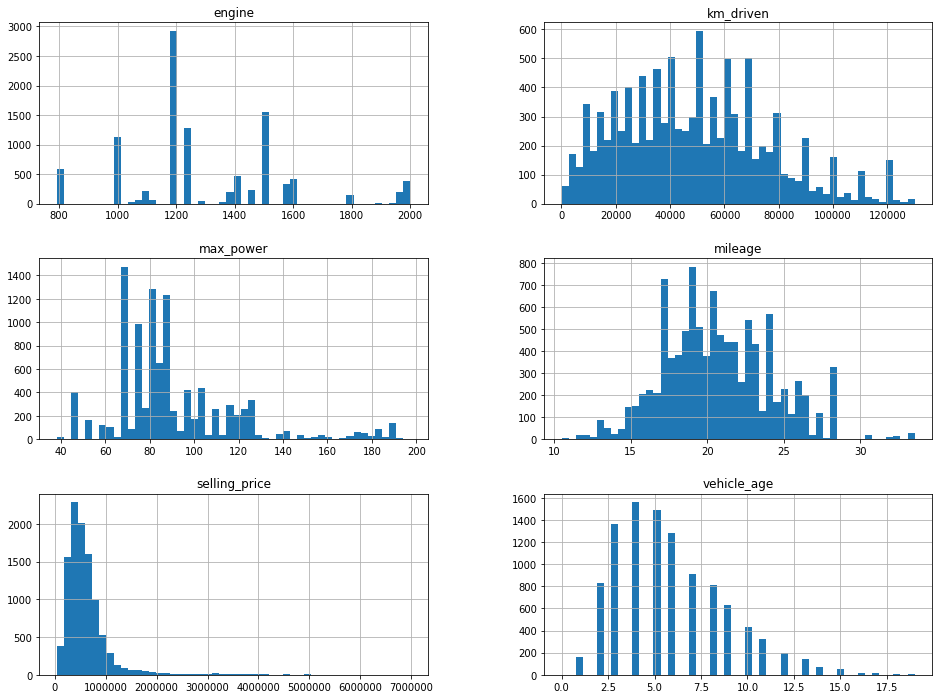

In [46]:
dummy1 = trainset.hist(bins=50, figsize=(16,12))

In [47]:
trainset.isnull().sum()

vehicle_age      0
km_driven        0
fuel_type        0
mileage          0
engine           0
max_power        0
selling_price    0
dtype: int64

In [48]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10305 entries, 8425 to 3881
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_age    10305 non-null  int64  
 1   km_driven      10305 non-null  int64  
 2   fuel_type      10305 non-null  object 
 3   mileage        10305 non-null  float64
 4   engine         10305 non-null  int64  
 5   max_power      10305 non-null  float64
 6   selling_price  10305 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 644.1+ KB


# Variable correlations

In [49]:
corr_matrix = trainset.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price    1.000000
max_power        0.727407
engine           0.620631
mileage         -0.148155
km_driven       -0.197833
vehicle_age     -0.362688
Name: selling_price, dtype: float64

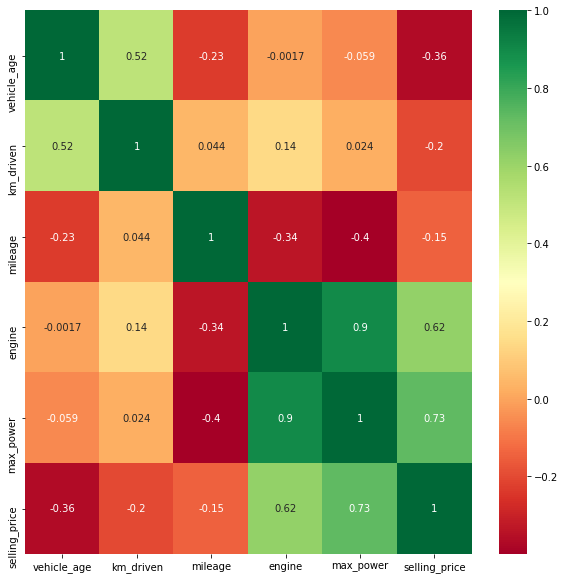

In [50]:
corrmat = trainset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(trainset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

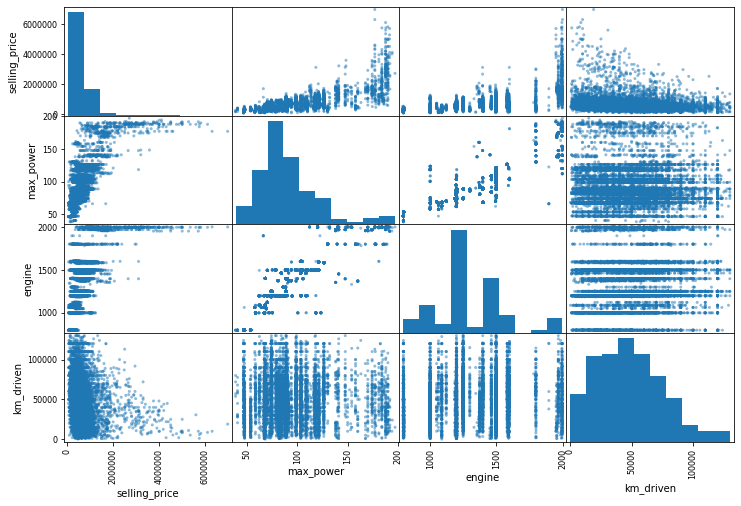

In [51]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["selling_price", "max_power", "engine", "km_driven"]
dummy = scatter_matrix(trainset[attributes], figsize=(12, 8))

# Feature engineering

# Missing Values

In [52]:
#Check for missing values
Missing_train = train_set.isnull().sum()
Missing_test = test_set.isnull().sum()
print(f'The training data has {Missing_train.sum()} missing values and the test data has {Missing_test.sum()} \
missing data.')

The training data has 0 missing values and the test data has 0 missing data.


# Create dummy variables

In [53]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

# the input to the encoder must be a 2-d numpy array,
# so we take the column, extract their values and reshape the array to be 2-d
cat_vals = trainset['fuel_type'].values.reshape(-1,1)

transformed = one_hot_encoder.fit_transform(cat_vals)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    trainset[col_name] = transformed[:,i]

# check if the dummies are produced correctly
trainset.head()

,vehicle_age,km_driven,fuel_type,mileage,engine,max_power,selling_price,Diesel,LPG,Petrol
8425,4,30000,Petrol,14.67,1798,177.46,1960000,0.0,0.0,1.0
10819,2,40000,Diesel,24.70,1047,69.00,529000,1.0,0.0,0.0
4790,8,56000,Petrol,19.10,1197,85.80,430000,0.0,0.0,1.0
5336,15,65000,Petrol,18.90,998,67.10,175000,0.0,0.0,1.0
2708,9,62000,Petrol,19.81,1086,68.05,255000,0.0,0.0,1.0


In [54]:
testset = testset.drop(testset[testset["fuel_type"]=="Electric"].index)
cat_vals = testset['fuel_type'].values.reshape(-1,1)

transformed = one_hot_encoder.transform(cat_vals)

for i, col_name in enumerate(col_names):
    testset[col_name] = transformed[:,i]
    
#Test to see it worked as intended
testset.head()

,vehicle_age,km_driven,fuel_type,mileage,engine,max_power,selling_price,Diesel,LPG,Petrol
2481,10,30000,Petrol,16.10,1197,85.0,350000,0.0,0.0,1.0
12591,4,54500,Petrol,19.12,1373,91.1,730000,0.0,0.0,1.0
14655,10,66000,Diesel,12.80,2494,102.0,750000,1.0,0.0,0.0
1871,9,70000,Diesel,19.30,1248,73.9,485000,1.0,0.0,0.0
14508,7,120000,Diesel,25.80,1498,98.6,300000,1.0,0.0,0.0


In [55]:
del trainset['fuel_type']
del testset['fuel_type']

# Feature scaling

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

trainset_target = trainset["selling_price"].values
trainset_predictors = trainset.drop("selling_price", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
trainset['selling_price'] = trainset_target

# inspect the data
trainset.head()

,vehicle_age,km_driven,mileage,engine,max_power,Diesel,LPG,Petrol,selling_price
0,-0.631579,-0.693933,-1.701604,1.838639,3.056769,-0.804826,-0.060837,0.850607,1960000
1,-1.309398,-0.326875,1.123582,-0.942064,-0.759522,1.242504,-0.060837,-1.175631,529000
2,0.724059,0.260417,-0.453790,-0.386664,-0.168395,-0.804826,-0.060837,0.850607,430000
3,3.096426,0.590769,-0.510125,-1.123495,-0.826376,-0.804826,-0.060837,0.850607,175000
4,1.062969,0.480652,-0.253802,-0.797660,-0.792949,-0.804826,-0.060837,0.850607,255000


In [57]:
testset_target = testset["selling_price"].values
testset_predictors = testset.drop("selling_price", axis=1)

scaled_vals = scaler.transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
testset['selling_price'] = testset_target

testset.head()

,vehicle_age,km_driven,mileage,engine,max_power,Diesel,LPG,Petrol,selling_price
0,1.401879,-0.693933,-1.298811,-0.386664,-0.196544,-0.804826,-0.060837,0.850607,350000
1,-0.631579,0.205358,-0.448156,0.265005,0.018092,-0.804826,-0.060837,0.850607,730000
2,1.401879,0.627475,-2.228334,4.415695,0.401621,1.242504,-0.060837,-1.175631,750000
3,1.062969,0.774298,-0.397455,-0.197828,-0.587110,1.242504,-0.060837,-1.175631,485000
4,0.385150,2.609587,1.433423,0.727839,0.281988,1.242504,-0.060837,-1.175631,300000


# Train models

In [58]:
# drop labels for training set, but keep all others
Xtrain = trainset.drop("selling_price", axis=1)
Xtest = testset.drop("selling_price", axis=1)

ytrain = trainset["selling_price"].copy()
ytest = testset["selling_price"].copy()

In [59]:
print(Xtrain.shape)
print(trainset.shape)

(10305, 8)
(10305, 9)


In [60]:
car_price = ytrain.median()
car_price

525000.0

# BASELINE

The RMSE is measured

In [61]:
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_price
yhat = np.full((ytrain.shape[0], 1), car_price)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

506623.41101992305

the base line is off buy INR 506623.41

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lin_reg.score(Xtrain, ytrain)

0.6582283033162298

The linear regression score or R^2 of this mode is 0.6582 which is considered to be good
the Root mean Squared error is calculated in the training data set.

In [64]:
# make predictions
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

lin_rmse

290661.51813512994

the prediction shows INR 290661.51 which is not better than the baseline model. the linear model assumes that there is linear relationship between the variable and the model is underfitted not able to obtain pattern in the data.

Lets visualize the prediction and the true values.

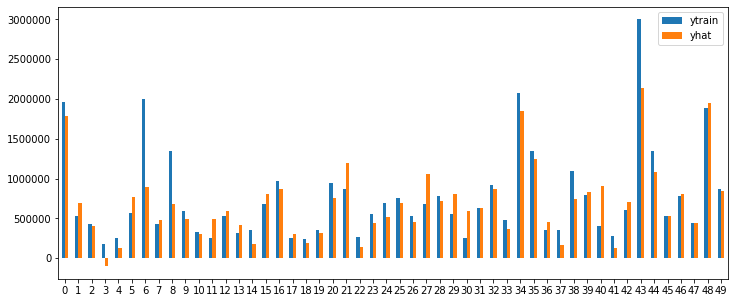

In [65]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

# Decision Trees

to find the complex non linear relationship between the data lets use powerful algorithm  desicion tree regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtrain, ytrain)
yhat = tree_reg.predict(Xtrain)
tree_mse = mean_squared_error(ytrain, yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

23200.540576931642

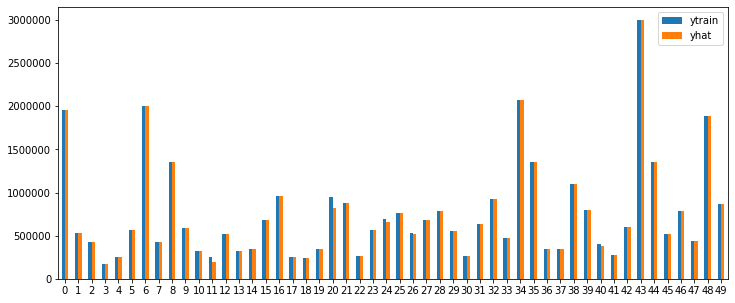

In [67]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

the decision tree model is capable of overfitting the data, until they have hyperparameter value is said to be maximum tree depth.the model prediction is not spot as the traing data have some error values were there could be misclassification. to check the model is better in the test data so we could evaluate the model using cross validation.

# Cross validation

the cross validation take the training dataset split into 𝑘 parts (e.g.,  𝑘 =10). by evaluating the kth part for k-1. repeating until the accuracy score is obtained. the final accuracy score obtaied is the mean of k model.

# Decision tree

In [69]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [197735.65099884 159692.78549548 133070.17234779 147266.583392
 175728.83775955 193179.04567867 179078.15246477 161036.48960434
 185370.97599363 160450.26691779]
Mean: 169260.8960652862
Standard deviation: 19521.711191330352


from this we can see that the original model that used to evaluate on the training dataset is said to be underfitted the data.

# Linear regression

In [70]:
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, Xtrain, ytrain,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [298618.53372863 284673.72214675 237380.76077102 302129.71576851
 258584.24371301 331500.9407656  272465.7423472  297192.96866833
 320053.48359782 295177.11479878]
Mean: 289777.7226305665
Standard deviation: 26488.770903894478


from this the linear regression slightly higher average error rate than the decision tree.

# Random forest

The Random forest algorithm build a model that consist of multiple decision trees on a random subset of the features and the predicition is based on there average.

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=7)
scores = cross_val_score(forest_reg, Xtrain, ytrain,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [172671.07683024 134538.96249298 115714.86465412 138579.5108107
 150726.20619056 147146.78391534 132382.03790585 136432.63623341
 166748.72039983 127301.25263615]
Mean: 142224.20520691824
Standard deviation: 16592.6989067636


The RMSE score is lower than the decision tree and linear regression methods and this can be explored.

# Tuning Hyperparameter

#here the hyperparameter is setted even before the model is trained and only few algorithm has the hyperparameter the best combination of hyperparamet is automatically set by scikit learn.

# Exhaustive Grid search

to obtain output and the best cross validation accuracy the GridSearchcv set the hyperparameter and construct the possible combination using cross validation.

In [75]:
from sklearn.model_selection import GridSearchCV

# specify the hyperparameters and their values
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_depth': [4, 6, 8, None]},
]

forest_reg = RandomForestRegressor(random_state=7)

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [76]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [77]:
np.sqrt(-grid_search.best_score_)

141468.06790084246

By tuning the hyperparameter we were able to reduce the error from 142224 to 141468

In [79]:
val_scores = grid_search.cv_results_["mean_test_score"]
train_scores = grid_search.cv_results_["mean_train_score"]
params = grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

204863.8861928749 192489.64568542858 {'max_depth': 4, 'n_estimators': 3}
195641.24517813235 184950.49177272193 {'max_depth': 4, 'n_estimators': 10}
193564.15154055392 184505.0531696242 {'max_depth': 4, 'n_estimators': 30}
170892.1834738076 146708.85633842245 {'max_depth': 6, 'n_estimators': 3}
162368.00114118878 139629.81429716633 {'max_depth': 6, 'n_estimators': 10}
160625.19827587318 138327.53877644523 {'max_depth': 6, 'n_estimators': 30}
157846.0546660296 120696.98822497117 {'max_depth': 8, 'n_estimators': 3}
148619.2748719497 112970.93650680453 {'max_depth': 8, 'n_estimators': 10}
148207.90160094888 111195.91795763248 {'max_depth': 8, 'n_estimators': 30}
159555.14025685197 78589.49085936097 {'max_depth': None, 'n_estimators': 3}
143188.83407497287 62235.60560581146 {'max_depth': None, 'n_estimators': 10}
141468.06790084246 56495.16467403107 {'max_depth': None, 'n_estimators': 30}


the model can be improvised by applying more limitations and enforcing a maximum depth to the tree.

# Randomized grid search

In [80]:
from sklearn.model_selection import RandomizedSearchCV

# specify the hyperparameters and their values
param_grid = {'n_estimators': [3, 10, 30], 'max_depth': [4, 6, 8, None]}

forest_reg = RandomForestRegressor(random_state=7)

# we'll use 10-fold cross-validation
rand_grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=10, n_iter=6,
                                     scoring='neg_mean_squared_error', random_state=7,
                                     return_train_score=True)

rand_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [81]:
rand_grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

it limits the models and controls the computing time by Randomsearchcv. it is similar to gridsearchcv and does the n_iterations and finds the random combiination.

# Analyze the most promising models

In [82]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_
for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

max_power: 0.6461634913903709
vehicle_age: 0.22056896562744038
km_driven: 0.04880526953115063
engine: 0.047066468168998156
mileage: 0.03486017561112071
Petrol: 0.0015001461559280317
Diesel: 0.001030192138325738
LPG: 5.291376665546895e-06


In [83]:
type(Xtrain)

pandas.core.frame.DataFrame

In [93]:
forest_reg = RandomForestRegressor(n_estimators=30, max_depth=None)
tree_reg.fit(Xtrain.values[:8000,:], ytrain.values[:8000])
yhat = tree_reg.predict(Xtrain.values[8000:, :])

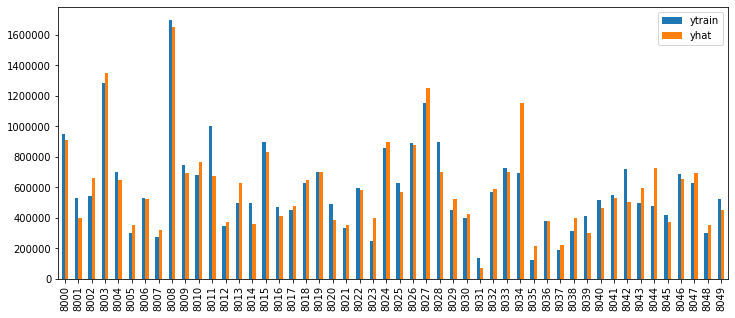

In [94]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[8000:8000+50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar")

In [96]:
 #the absolute difference between the prediction and the true value 
cond_idx = np.abs(ytrain[8000:] - yhat)/ytrain[8000:] > 0.5

In [97]:
#number of such cases
cond_idx.sum()

92

In [98]:
#print
trainset[8000:][cond_idx]

,vehicle_age,km_driven,mileage,engine,max_power,Diesel,LPG,Petrol,selling_price
8023,0.724059,0.997873,-0.200284,0.361275,-0.792949,1.242504,-0.060837,-1.175631,245000
8034,-0.631579,1.324885,-0.236901,0.590840,0.630331,1.242504,-0.060837,-1.175631,690000
8035,2.079698,1.141356,-0.786165,-0.797660,-1.002307,-0.804826,-0.060837,0.850607,125000
8044,0.385150,0.847709,0.453199,1.038863,1.257349,1.242504,-0.060837,-1.175631,475000
8060,3.435336,0.407240,-2.171999,0.709325,0.331249,-0.804826,-0.060837,0.850607,225000
...,...,...,...,...,...,...,...,...,...
10202,-1.648307,1.000589,-0.397455,-0.197828,-0.587110,1.242504,-0.060837,-1.175631,350000
10206,-0.970488,-0.693933,-0.991786,-0.386664,-0.307028,-0.804826,-0.060837,0.850607,550000
10226,1.401879,2.169117,0.557418,2.568064,3.498004,1.242504,-0.060837,-1.175631,550000
10229,0.724059,2.242529,-1.042488,1.072187,1.080714,-0.804826,-0.060837,0.850607,370000


# Evaluate on the test set

In [99]:
Xtest = testset.drop("selling_price", axis=1)
ytest = testset["selling_price"].copy()

best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

831667.3639664055

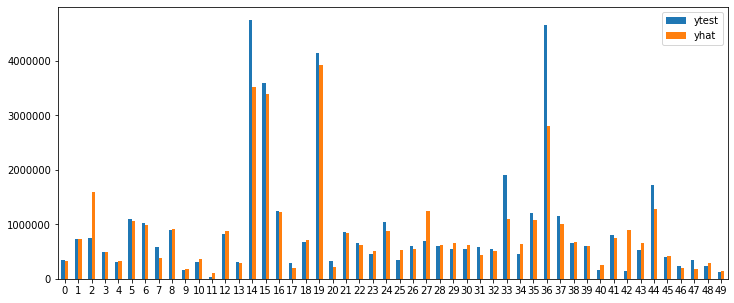

In [100]:
#the performance of the test is better than the perfomance of the training set
df_tmp = pd.DataFrame({"ytest": ytest[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)